# Library

In [2]:
# Library

from math import *
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randn, seed
from scipy import stats 
from ipywidgets import interact
from sympy import Symbol, Matrix
from sympy.interactive import printing
from numpy.linalg import inv

# Functions


In [4]:
def normal(mu, sigma2, x):
    coefficient = 1.0 / sqrt(2.0 * pi *sigma2)
    exponential = exp(-0.5 * (x-mu) ** 2 / sigma2)
    n = coefficient * exponential
    return n

In [5]:
def update(mean1, var1, mean2, var2):
 
    new_mean = (var2*mean1 + var1*mean2)/(var2+var1)
    new_var = 1/(1/var2 + 1/var1)
    
    return [new_mean, new_var]

In [6]:
def predict(mean1, var1, mean2, var2):
    
    new_mean = mean1 + mean2
    new_var = var1 + var2
    
    return [new_mean, new_var]

In [51]:
def predictd(self, u = 0):

    self.x = np.dot(self.F, self.x) + np.dot(self.B, u)
    self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
    return self.x

def updated(self, z):

    y = z - np.dot(self.H, self.x)
    S = self.R + np.dot(self.H, np.dot(self.P, self.H.T))
    K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
    self.x = self.x + np.dot(K, y)
    I = np.eye(self.n)
    self.P = np.dot(np.dot(I - np.dot(K, self.H), self.P), 
        (I - np.dot(K, self.H)).T) + np.dot(np.dot(K, self.R), K.T)

# KF 1D

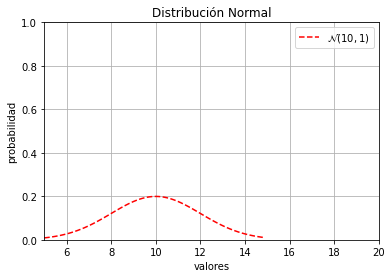

In [7]:
mean1, var1 = (10. , 2)

xs = np.arange(5, 15, 0.1)
normal = stats.norm(mean1, var1)
ys = normal.pdf(xs) # Función de Probabilidad

plt.plot(xs, ys, 'r', ls='--', label='$\mathcal{N}(10,1) $')
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')

plt.xlim(5, 20)
plt.ylim(0, 1.0);

plt.grid()
plt.legend()
plt.show()

Mean of readings is 9.944


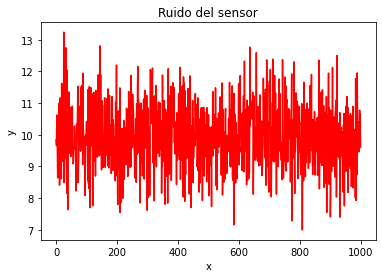

In [8]:
xs = range(1000)
ys = randn(1000)*1. + 10.
plt.plot(xs, ys, '-r')
plt.title("Ruido del sensor")
plt.xlabel("x")
plt.ylabel("y");

print(f'Mean of readings is {np.mean(ys):.3f}')

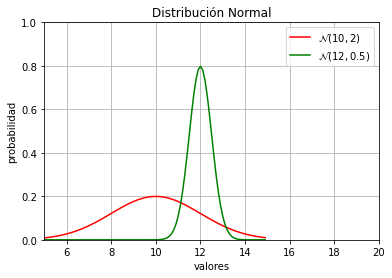

In [9]:
mean1, var1 = (10. , 2. )
mean2, var2 = (12. , 0.5 )

mu , sig = update(mean1, var1, mean2, var2)

xs = np.arange(5, 15, 0.1)
normal = stats.norm(mean1, var1)
ys = normal.pdf(xs) # Función de Probabilidad

plt.plot(xs, ys, 'r', label='$\mathcal{N}(10,2)$')

normal = stats.norm(mean2, var2)
ys = normal.pdf(xs) # Función de Probabilidad

plt.plot(xs, ys, 'g', label='$\mathcal{N}(12,0.5)$')
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')

plt.xlim(5, 20)
plt.ylim(0, 1.0);

plt.grid()
plt.legend()
plt.show()


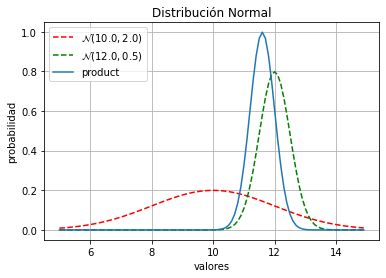

In [10]:
def plot_produc(mean1, var1, mean2, var2):

    plt.figure()

    mu , sig = update(mean1, var1, mean2, var2)
    
    xs = np.arange(5, 15, 0.1)
    
    # Normal distribution 1    
    normal = stats.norm(mean1, var1)
    ys = normal.pdf(xs)
    plt.plot(xs, ys, 'r', label='$\mathcal{N}$'+'$({},{})$'.format(mean1, var1), ls='--')
    
    # Normal distribution 2
    normal = stats.norm(mean2, var2)
    ys = normal.pdf(xs)
    plt.plot(xs, ys, 'g',label='$\mathcal{N}$'+'$({},{})$'.format(mean2, var2), ls='--')
        
    # Resulting normal distribution
    normal = stats.norm(mu, sig)
    ys = normal.pdf(xs) 
    plt.plot(xs, ys, label='product')
    plt.title('Distribución Normal')
    plt.ylabel('probabilidad')
    plt.xlabel('valores')
    plt.grid()
    plt.legend()
    plt.show()

    
mean1, var1 = (10. , 2. )
mean2, var2 = (12. , 0.5)
plot_produc(mean1, var1, mean2, var2)


##  E1

In [11]:
class DogSimulation(object):
    def __init__(self, x0=0, velocity=1,
                 measurement_var=0.0,
                 process_var=0.0):
        """ x0 : initial position
            velocity: (+=right, -=left)
            measurement_var: variance in measurement m^2
            process_var: variance in process (m/s)^2
        """
        self.x = x0
        self.velocity = velocity
        self.meas_std = sqrt(measurement_var)
        self.process_std = sqrt(process_var)

    def move(self, dt=1.0):
        """Compute new position of the dog in dt seconds."""
        dx = self.velocity + randn()*self.process_std
        self.x += dx * dt

    def sense_position(self):
        """ Returns measurement of new position in meters."""
        measurement = self.x + randn()*self.meas_std
        return measurement

    def move_and_sense(self):
        """ Move dog, and return measurement of new position in meters"""
        self.move()
        return self.sense_position()

In [12]:
np.random.seed(13)

process_var = 1. # variance in the dog's movement
sensor_var = 2. # variance in the sensor

xmean, xvar = (0. , 20.**2 )   # dog's position, N(0, 20**2)

velocity = 1
dt = 1. # time step in seconds

model_mean, model_var = (velocity*dt, process_var) # displacement to add to x

dog = DogSimulation(
    x0= xmean, 
    velocity= model_mean, 
    measurement_var= sensor_var, 
    process_var= model_var)

zs = [dog.move_and_sense() for _ in range(10)]
zs

[1.3535959735108178,
 1.8820653967131618,
 4.341047429453569,
 7.156332673205118,
 6.938695089418526,
 6.843912342028484,
 9.846824080052299,
 12.553482049375292,
 16.2730841073834,
 14.800411177015299]

In [13]:
print('PREDICT\t\t\tUPDATE')
print('     x      var\t\t  z\t    x      var')

# perform Kalman filter on measurement z
for z in zs:    
    
    pmean , pvar = predict(xmean, xvar, model_mean, model_var) #prior
    lmean , lvar = (z, sensor_var) # likelihood
    
    xmean, xvar = update(pmean , pvar, lmean , lvar)

      
    predict_template = '{: 7.3f} {: 8.3f}'
    update_template = '{:.3f}\t{: 7.3f} {: 7.3f}'

    print(predict_template.format(pmean, pvar),end='\t')
    print(update_template.format(z, lmean, lvar))

print()
print('final estimate:        {:10.3f}'.format(xmean))
print('actual final position: {:10.3f}'.format(dog.x))

PREDICT			UPDATE
     x      var		  z	    x      var
  1.000  401.000	1.354	  1.354   2.000
  2.352    2.990	1.882	  1.882   2.000
  3.070    2.198	4.341	  4.341   2.000
  4.736    2.047	7.156	  7.156   2.000
  6.960    2.012	6.939	  6.939   2.000
  7.949    2.003	6.844	  6.844   2.000
  8.396    2.001	9.847	  9.847   2.000
 10.122    2.000	12.553	 12.553   2.000
 12.338    2.000	16.273	 16.273   2.000
 15.305    2.000	14.800	 14.800   2.000

final estimate:            15.053
actual final position:     14.838


In [14]:
def plot_predictions(p, rng=None, label='Prediction'):
    if rng is None:
        rng = range(len(p))
    plt.scatter(rng, p, marker='v', s=40, edgecolor='r',
                facecolor='None', lw=2, label=label)


def plot_filter(xs, ys=None, dt=None, c='C0', label='Filter', var=None, **kwargs):
    """ plot result of KF with color `c`, optionally displaying the variance
    of `xs`. Returns the list of lines generated by plt.plot()"""

    if ys is None and dt is not None:
        ys = xs
        xs = np.arange(0, len(ys) * dt, dt)
    if ys is None:
        ys = xs
        xs = range(len(ys))

    lines = plt.plot(xs, ys, color=c, label=label, **kwargs)
    if var is None:
        return lines

    var = np.asarray(var)
    std = np.sqrt(var)
    std_top = ys+std
    std_btm = ys-std

    plt.plot(xs, ys+std, linestyle=':', color='k', lw=2)
    plt.plot(xs, ys-std, linestyle=':', color='k', lw=2)
    plt.fill_between(xs, std_btm, std_top,
                     facecolor='yellow', alpha=0.2)

    return lines

def plot_measurements(xs, ys=None, dt=None, color='k', lw=1, label='Measurements',
                      lines=False, **kwargs):
    """ Helper function to give a consistant way to display
    measurements in the book.
    """
    if ys is None and dt is not None:
        ys = xs
        xs = np.arange(0, len(ys)*dt, dt)

    plt.autoscale(tight=False)
    if lines:
        if ys is not None:
            return plt.plot(xs, ys, color=color, lw=lw, ls='--', label=label, **kwargs)
        else:
            return plt.plot(xs, color=color, lw=lw, ls='--', label=label, **kwargs)
    else:
        if ys is not None:
            return plt.scatter(xs, ys, edgecolor=color, facecolor='none',
                        lw=2, label=label, **kwargs),
        else:
            return plt.scatter(range(len(xs)), xs, edgecolor=color, facecolor='none',
                        lw=2, label=label, **kwargs),
        
        

def plot_filter(step):
    plt.cla()
    step -= 1
    i = step // 3 + 1
 
    plot_predictions(predictions[:i])    
    if step % 3 == 0:
        plot_measurements(zs[:i-1])
        plot_filter(xs[:i-1])
    elif step % 3 == 1:
        plot_measurements(zs[:i])
        plot_filter(xs[:i-1])
    else:
        plot_measurements(zs[:i])
        plot_filter(xs[:i])

    plt.xlim(-1, 10)
    plt.ylim(0, 20)
    plt.legend(loc=2);

interactive(children=(IntSlider(value=1, description='step', max=30, min=1), Output()), _dom_classes=('widget-…

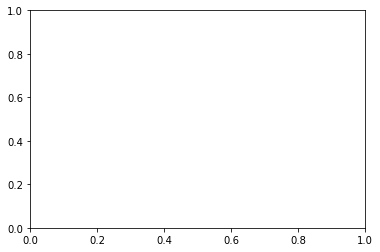

In [15]:

from ipywidgets.widgets import IntSlider

# save output in these lists for plotting
xs, predictions = [], []

process_model = (velocity, process_var) 

# perform Kalman filter
x = (0., 20.**2)

for z in zs:    
    prior = predict(x[0],x[1], process_model[0],process_model[1])
    likelihood = (z, sensor_var)
    x = update(prior[0],prior[1], likelihood[0], likelihood[1])

    # save results
    predictions.append(prior[0])
    xs.append(x[0])


    
interact(plot_filter, step=IntSlider(value=1, min=1, max=len(predictions)*3));

## E2

In [16]:
# 1D-Kalman Filter

sigma_mess = 4
sigma_move = 2
 
mu = 0
sig = 10000
 
## Kalman-Berechnung
 
z = [5, 6, 7, 9, 10];
zs= [1, 1, 2, 1, 1];
 
for i in range(len(z)): 
    
    mu,sig = predict(mu,sig,zs[i],sigma_move);
    
    print('Predict: ({:10.3f}'.format(mu),',{:10.3f})'.format(sig))
    
    [mu,sig]=update(mu,sig,z[i],sigma_mess)
    
    print('Update:  ({:10.3f}'.format(mu),',{:10.3f})'.format(sig))


Predict: (     1.000 , 10002.000)
Update:  (     4.998 ,     3.998)
Predict: (     5.998 ,     5.998)
Update:  (     5.999 ,     2.400)
Predict: (     7.999 ,     4.400)
Update:  (     7.476 ,     2.095)
Predict: (     8.476 ,     4.095)
Update:  (     8.741 ,     2.024)
Predict: (     9.741 ,     4.024)
Update:  (     9.871 ,     2.006)


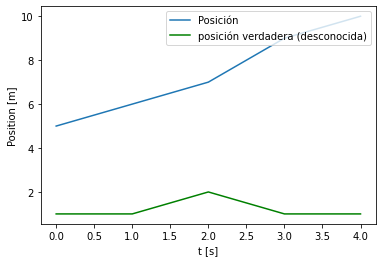

In [17]:

plt.plot(z, label=u'Posición')
plt.plot(zs, label=u'posición verdadera (desconocida)', c='g')


plt.xlabel('t [s]')
plt.ylabel('Position [m]')

plt.legend(loc=1)



# KF Multidimensional

## KF 

## Multidimensional normal distribution

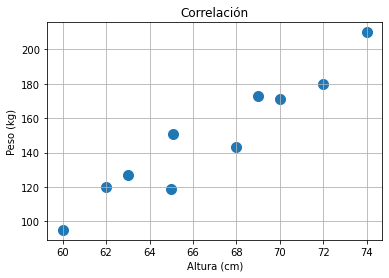

In [20]:
altura = [60, 62, 63, 65, 65.1, 68, 69, 70, 72, 74]
peso = [95, 120, 127, 119, 151, 143, 173, 171, 180, 210]
# Considerando una correlación lineal
plt.scatter(altura,peso, s=100)
plt.title('Correlación')
plt.ylabel('Peso (kg)')
plt.xlabel('Altura (cm)')
plt.grid()
plt.show()

In [21]:
W = [70.1, 91.2, 59.5, 93.2, 53.5]
H = [1.8, 2.0, 1.7, 1.9, 1.6]
np.cov(H, W)

array([[2.50000e-02, 2.72750e+00],
       [2.72750e+00, 3.27235e+02]])

In [22]:
np.cov(H, W, bias=1)

array([[2.00000e-02, 2.18200e+00],
       [2.18200e+00, 2.61788e+02]])

In [23]:
X = np.linspace(1, 10, 100)
Y = np.linspace(1, 10, 100)
np.cov(X, Y)

array([[6.95592287, 6.95592287],
       [6.95592287, 6.95592287]])

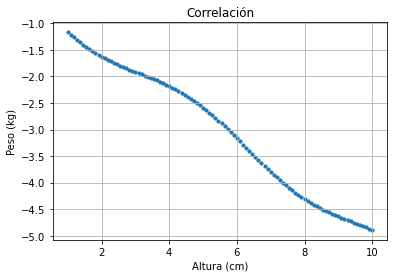

[[ 6.95592287 -3.08427   ]
 [-3.08427     1.38681544]]


In [24]:
X = np.linspace(1, 10, 100)
Y = -(np.linspace(1, 5, 100) + np.sin(X)*.2)
plt.scatter(X,Y, s=10)
plt.title('Correlación')
plt.ylabel('Peso (kg)')
plt.xlabel('Altura (cm)')
plt.grid()
plt.show()
print(np.cov(X, Y))

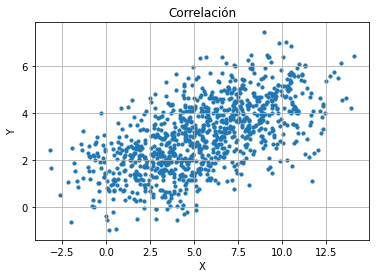

[[10.68429792  2.94026673]
 [ 2.94026673  2.24416077]]


In [25]:
X = np.linspace(1, 10, 1000) + randn(1000)*2
Y = np.linspace(1, 5, 1000) + randn(1000)
plt.scatter(X,Y, s=10)
plt.title('Correlación')
plt.ylabel('Y')#Peso (kg)
plt.xlabel('X')#Altura (cm)
plt.grid()
plt.show()
print(np.cov(X, Y))


[[1.00591559e+00 7.01583386e-04]
 [7.01583386e-04 1.00283467e+00]]


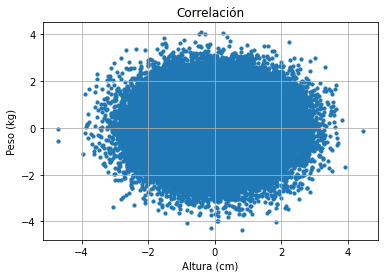

In [26]:
X = randn(100000)
Y = randn(100000)

print(np.cov(X, Y))
plt.scatter(X,Y, s=10)
plt.title('Correlación')
plt.ylabel('Peso (kg)')
plt.xlabel('Altura (cm)')
plt.grid()
plt.show()

Filtro de kalman para velocidad constante

## Initial State

[[0.]
 [0.]
 [0.]
 [0.]] (4, 1)


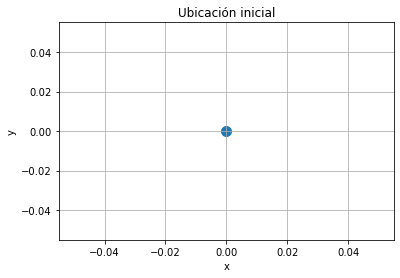

In [27]:
# Estado inicial
x = np.matrix([[0.0, 0.0, 0.0, 0.0]]).T
print(x, x.shape)
plt.scatter(float(x[0]),float(x[1]), s=100)
plt.title('Ubicación inicial')
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

## Initial process uncertainty (noise)

In [28]:
P = np.diag([500.0, 500.0, 500.0, 500.0])
print(P, P.shape)

[[500.   0.   0.   0.]
 [  0. 500.   0.   0.]
 [  0.   0. 500.   0.]
 [  0.   0.   0. 500.]] (4, 4)


## State transition matrix

In [29]:
dt = 0.1 # Paso de tiempo entre los estados

A = np.matrix([[1.0, 0.0, dt, 0.0 ]  ,
               [0.0, 1.0, 0.0, dt ]  ,
               [0.0, 0.0, 1.0, 0.0]  ,
               [0.0, 0.0, 0.0, 1.0]] )

print(A, A.shape)

[[1.  0.  0.1 0. ]
 [0.  1.  0.  0.1]
 [0.  0.  1.  0. ]
 [0.  0.  0.  1. ]] (4, 4)


## Measurement matrix

In [30]:
H = np.matrix([[0.0, 0.0, 1.0, 0.0],
               [0.0, 0.0, 0.0, 1.0]])
print(H, H.shape)

[[0. 0. 1. 0.]
 [0. 0. 0. 1.]] (2, 4)


## Measurement noise (Covariance)

In [31]:
ra = 10.0**2

R = np.matrix([[ra, 0.0],
               [0.0, ra]])

print(R, R.shape)

[[100.   0.]
 [  0. 100.]] (2, 2)


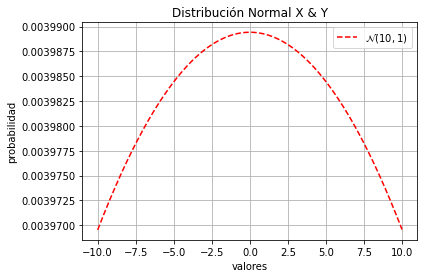

In [32]:
mean1, var1 = (0. , R[0,0])

xs = np.arange(-10, 10, 0.01)
normal = stats.norm(mean1, var1)
ys = normal.pdf(xs) # Función de Probabilidad

plt.plot(xs, ys, 'r', ls='--', label='$\mathcal{N}(10,1) $')
plt.title('Distribución Normal X & Y')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.grid()
plt.legend()
plt.show()

## Process noise (Covariance Q)

In [33]:
sv = 8.8

G = np.matrix([[0.5*dt**2],
               [0.5*dt**2],
               [dt],
               [dt]])

Q = G*G.T*sv**2

In [34]:
printing.init_printing()
dts = Symbol('dt')
Qs = Matrix([[0.5*dts**2],[0.5*dts**2],[dts],[dts]])
Qs*Qs.T

⎡       4         4        3        3⎤
⎢0.25⋅dt   0.25⋅dt   0.5⋅dt   0.5⋅dt ⎥
⎢                                    ⎥
⎢       4         4        3        3⎥
⎢0.25⋅dt   0.25⋅dt   0.5⋅dt   0.5⋅dt ⎥
⎢                                    ⎥
⎢      3         3       2        2  ⎥
⎢0.5⋅dt    0.5⋅dt      dt       dt   ⎥
⎢                                    ⎥
⎢      3         3       2        2  ⎥
⎣0.5⋅dt    0.5⋅dt      dt       dt   ⎦

In [35]:
#Matriz Identidad
I = np.eye(4)
print(I, I.shape)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] (4, 4)


##  Randomly generated measurement values

In [1]:
m = 1000 # Medidas
vx= 15 
vy= 5

mx = np.array(vx+np.random.randn(m))
my = np.array(vy+np.random.randn(m))

measurements = np.vstack((mx,my))

print(measurements.shape)

print('Desviación estándar de las medidas de aceleración =%.2f' % np.std(mx))
print('Suponer %.2f en R.' % R[0,0])

(2, 1000)
Desviación estándar de las medidas de aceleración =1.01


NameError: name 'R' is not defined

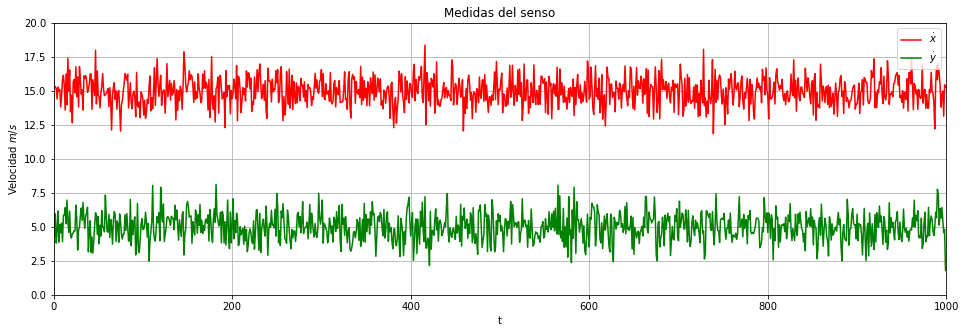

In [4]:
fig = plt.figure(figsize=(16,5))

plt.plot(range(m),mx, 'r', label='$\dot x$')
plt.plot(range(m),my, 'g',label='$\dot y$')


plt.title('Medidas del senso')
plt.ylabel(r'Velocidad $m/s$')
plt.xlabel('t')

plt.xlim(0, 1000)
plt.ylim(0, 20);

plt.grid()
plt.legend(loc=1)
plt.show()

## Multi-dimensional KF implementation

In [38]:
xt = []
yt = []
dxt = []
dyt = []
Zx = []
Zy = []
Px = []
Py = []
Pdx = []
Pdy = []
Rdx = []
Rdy = []
Kx = []
Ky = []
Kdx = []
Kdy = []


def savestates(x, Z, P, R, K):
    xt.append(float(x[0]))
    yt.append(float(x[1]))
    dxt.append(float(x[2]))
    dyt.append(float(x[3]))
    Zx.append(float(Z[0]))
    Zy.append(float(Z[1]))
    Px.append(float(P[0, 0]))
    Py.append(float(P[1, 1]))
    Pdx.append(float(P[2, 2]))
    Pdy.append(float(P[3, 3]))
    Rdx.append(float(R[0, 0]))
    Rdy.append(float(R[1, 1]))
    Kx.append(float(K[0, 0]))
    Ky.append(float(K[1, 0]))
    Kdx.append(float(K[2, 0]))
    Kdy.append(float(K[3, 0]))

In [39]:
for n in range(len(measurements[0])):
 
    # Predicción
    x = A*x
    P = A*P*A.T + Q
    
   
    # Actualización de medición (corrección)
    S = H*P*H.T + R
    K = (P*H.T) * np.linalg.pinv(S) # Ganancia de Kalman

    
    # Actualización
    Z = measurements[:,n].reshape(2,1)
    y = Z - (H*x)                           # Innovación o residual
    x = x + (K*y)
    
   
    P = (I - (K*H))*P  # Actualización de la covarianza del error 
    
    
    
    savestates(x, Z, P, R, K)

## Results visualization

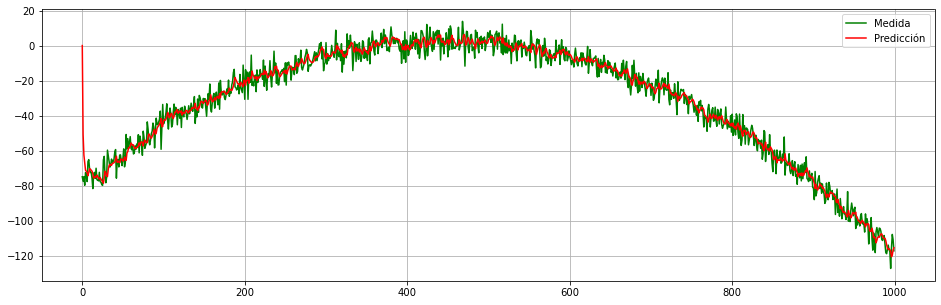

In [66]:
dt = 1.0/60
F = np.array([[1, dt, 0], [0, 1, dt], [0, 0, 1]])
H = np.array([1, 0, 0]).reshape(1, 3)
Q = np.array([[0.05, 0.05, 0.0], [0.05, 0.05, 0.0], [0.0, 0.0, 0.0]])
R = np.array([0.5]).reshape(1, 1)

x = np.linspace(-10, 10, 1000)
measurements = - (x**2 + 2*x - 2)  + np.random.normal(0, 5, 1000)

kf = KalmanFilter(F = F, H = H, Q = Q, R = R)
predictions = []

for z in measurements:
    predictions.append(np.dot(H,  kf.predict())[0])
    kf.update(z)

fig = plt.figure(figsize=(16,5))
plt.plot(range(len(measurements)), measurements, 'g', label = 'Medida')
plt.plot(range(len(predictions)), np.array(predictions),'r', label = 'Predicción')
plt.grid()
plt.legend()
plt.show()


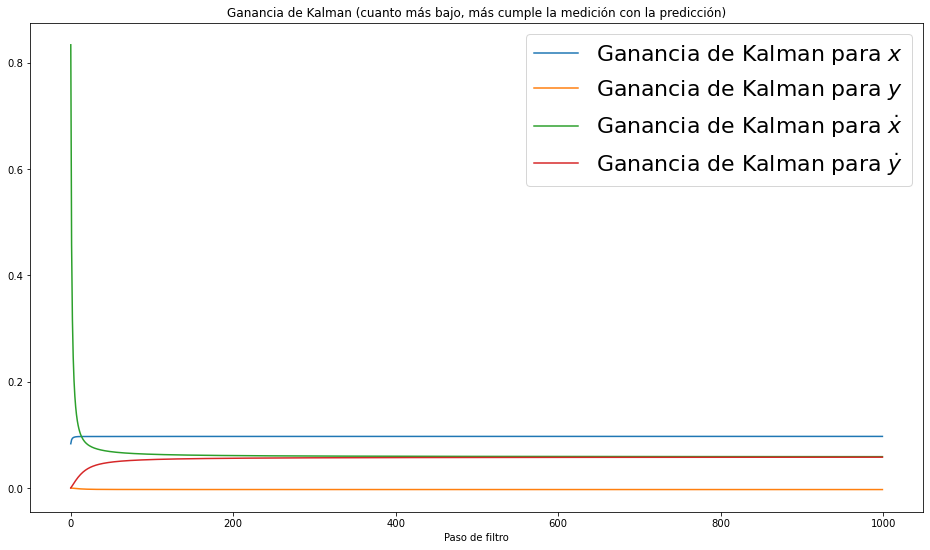

In [40]:
def plot_K():
    fig = plt.figure(figsize=(16,9))
    plt.plot(range(len(measurements[0])),Kx, label='Ganancia de Kalman para $x$')
    plt.plot(range(len(measurements[0])),Ky, label='Ganancia de Kalman para $y$')
    plt.plot(range(len(measurements[0])),Kdx, label='Ganancia de Kalman para $\dot x$')
    plt.plot(range(len(measurements[0])),Kdy, label='Ganancia de Kalman para $\dot y$')

    plt.xlabel('Paso de filtro')
    plt.ylabel('')
    plt.title('Ganancia de Kalman (cuanto más bajo, más cumple la medición con la predicción)')
    plt.legend(loc='best',prop={'size':22})

plot_K()

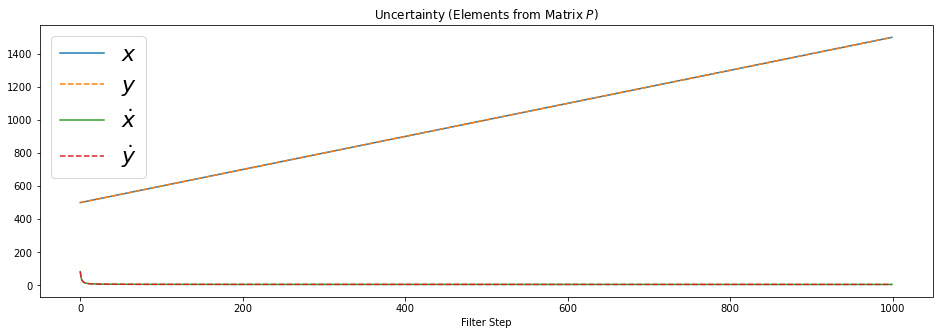

In [41]:
def plot_P():
    fig = plt.figure(figsize=(16,5))
    plt.plot(range(len(measurements[0])),Px, label='$x$')
    plt.plot(range(len(measurements[0])),Py, ls='--',label='$y$')
    plt.plot(range(len(measurements[0])),Pdx, label='$\dot x$')
    plt.plot(range(len(measurements[0])),Pdy, ls='--',label='$\dot y$')

    plt.xlabel('Filter Step')
    plt.ylabel('')
    plt.title('Uncertainty (Elements from Matrix $P$)')
    plt.legend(loc='best',prop={'size':22})
plot_P()

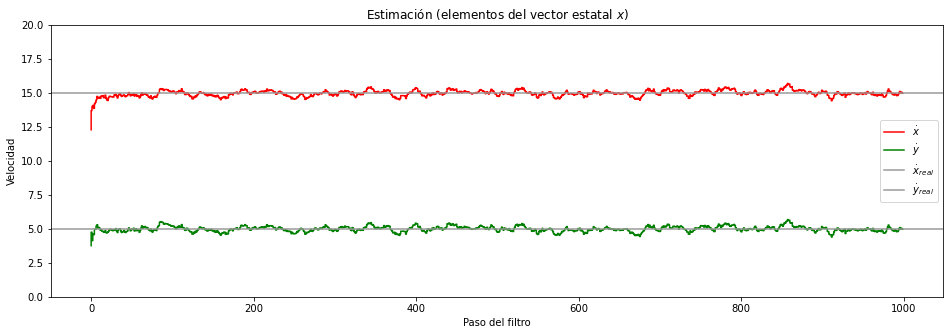

In [44]:
def plot_x():
    fig = plt.figure(figsize=(16,5))
    plt.step(range(len(measurements[1])),dxt,'r', label='$\dot x$')
    plt.step(range(len(measurements[1])),dyt,'g', label='$\dot y$')

    plt.axhline(vx, color='#999999', label='$\dot x_{real}$')
    plt.axhline(vy, color='#999999', label='$\dot y_{real}$')

    plt.xlabel('Paso del filtro')
    plt.title('Estimación (elementos del vector estatal $x$)')
    plt.legend(loc='best',prop={'size':10})
    plt.ylim([0, 20])
    plt.ylabel('Velocidad')
    
plot_x()

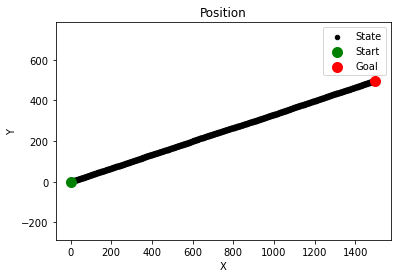

In [43]:
def plot_xy():
    #fig = plt.figure(figsize=(10,10))
    plt.scatter(xt,yt, s=20, label='State', c='k')
    plt.scatter(xt[0],yt[0], s=100, label='Start', c='g')
    plt.scatter(xt[-1],yt[-1], s=100, label='Goal', c='r')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Position')
    plt.legend(loc='best')
    plt.axis('equal')
    
plot_xy()